In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans 

from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df = pd.read_csv("bank_marketing_part1_Data.csv")
df_h = pd.read_csv("bank_marketing_part1_Data.csv")
df_k = pd.read_csv("bank_marketing_part1_Data.csv")

In [4]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [5]:
df.shape

(210, 7)

In [6]:
df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [8]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [9]:
df.duplicated().sum()

0

#### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [10]:
#Univariate Analysis

In [11]:
#Numeric variables

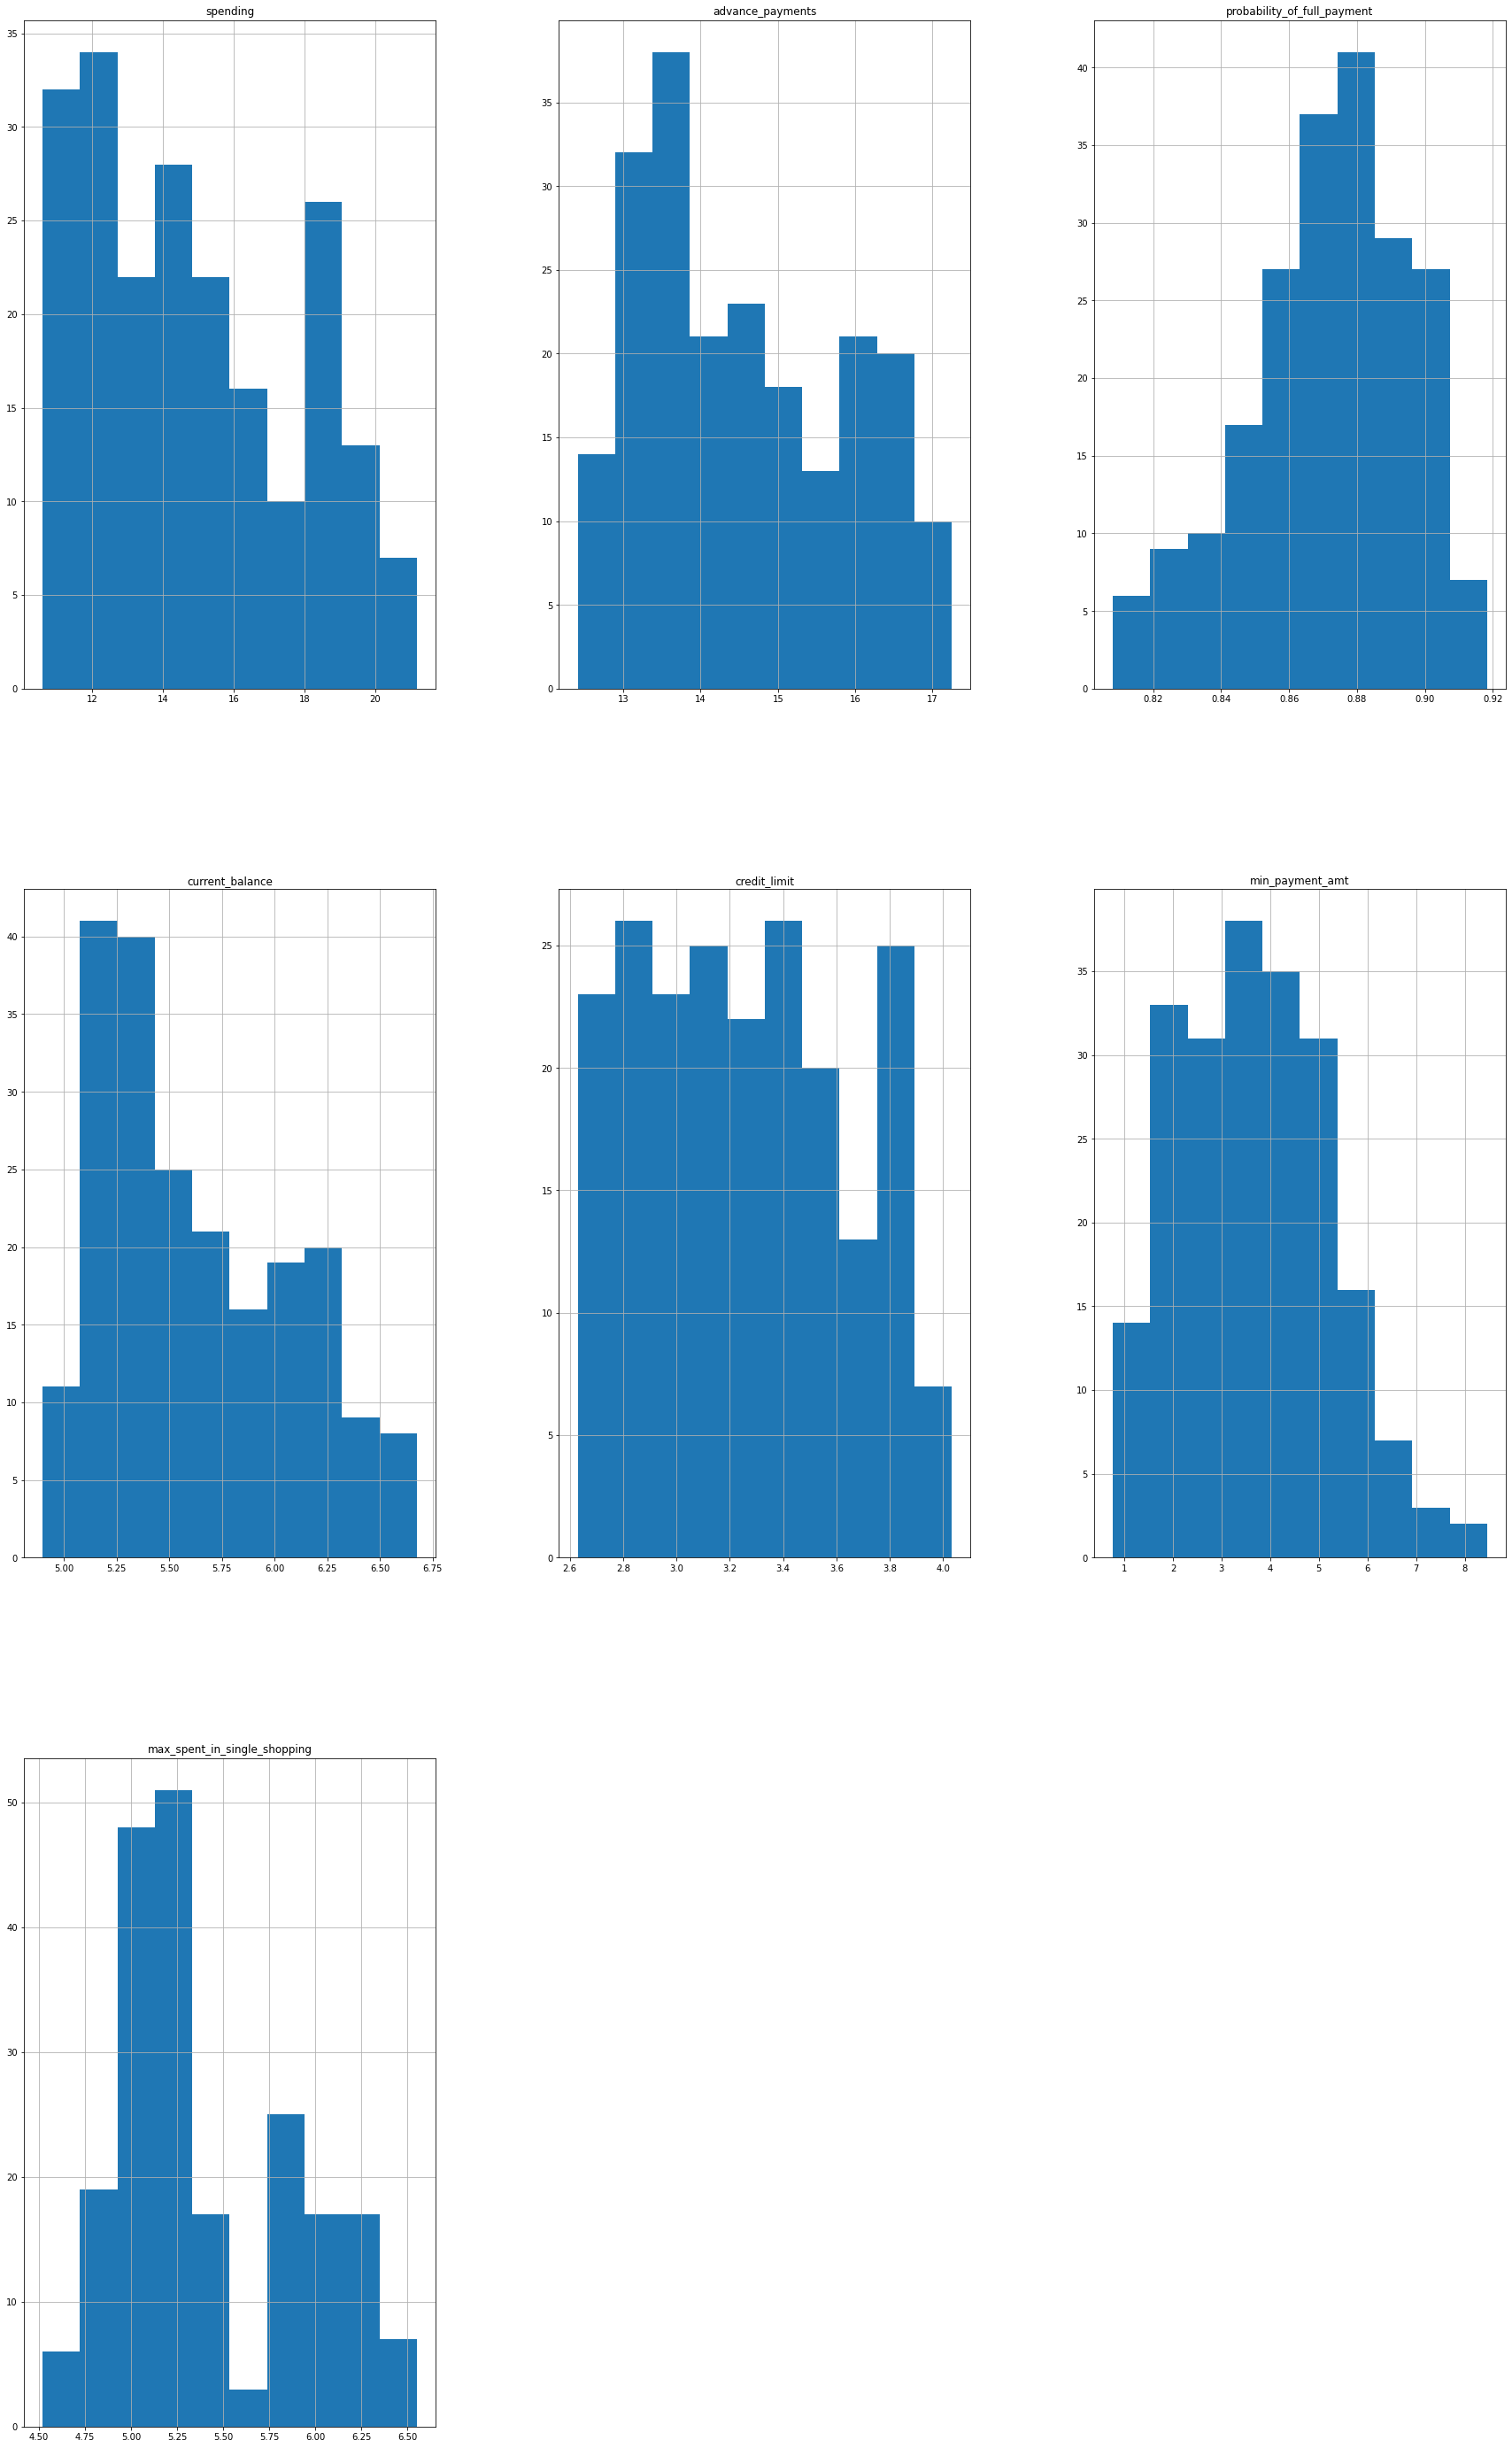

In [12]:
df.hist(column = df.columns, figsize=(30,50));

In [13]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

In [14]:
# Measure the skeweness of the required columns
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.spending),stats.skew(df.advance_payments),
                                       stats.skew(df.probability_of_full_payment),stats.skew(df.current_balance),
                                       stats.skew(df.credit_limit),stats.skew(df.min_payment_amt),
                                       stats.skew(df.max_spent_in_single_shopping)]},
                        index=['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'])  

Skewness

,Skewness
spending,0.397027
advance_payments,0.383806
probability_of_full_payment,-0.534104
current_balance,0.521721
credit_limit,0.133416
min_payment_amt,0.398793
max_spent_in_single_shopping,0.557876


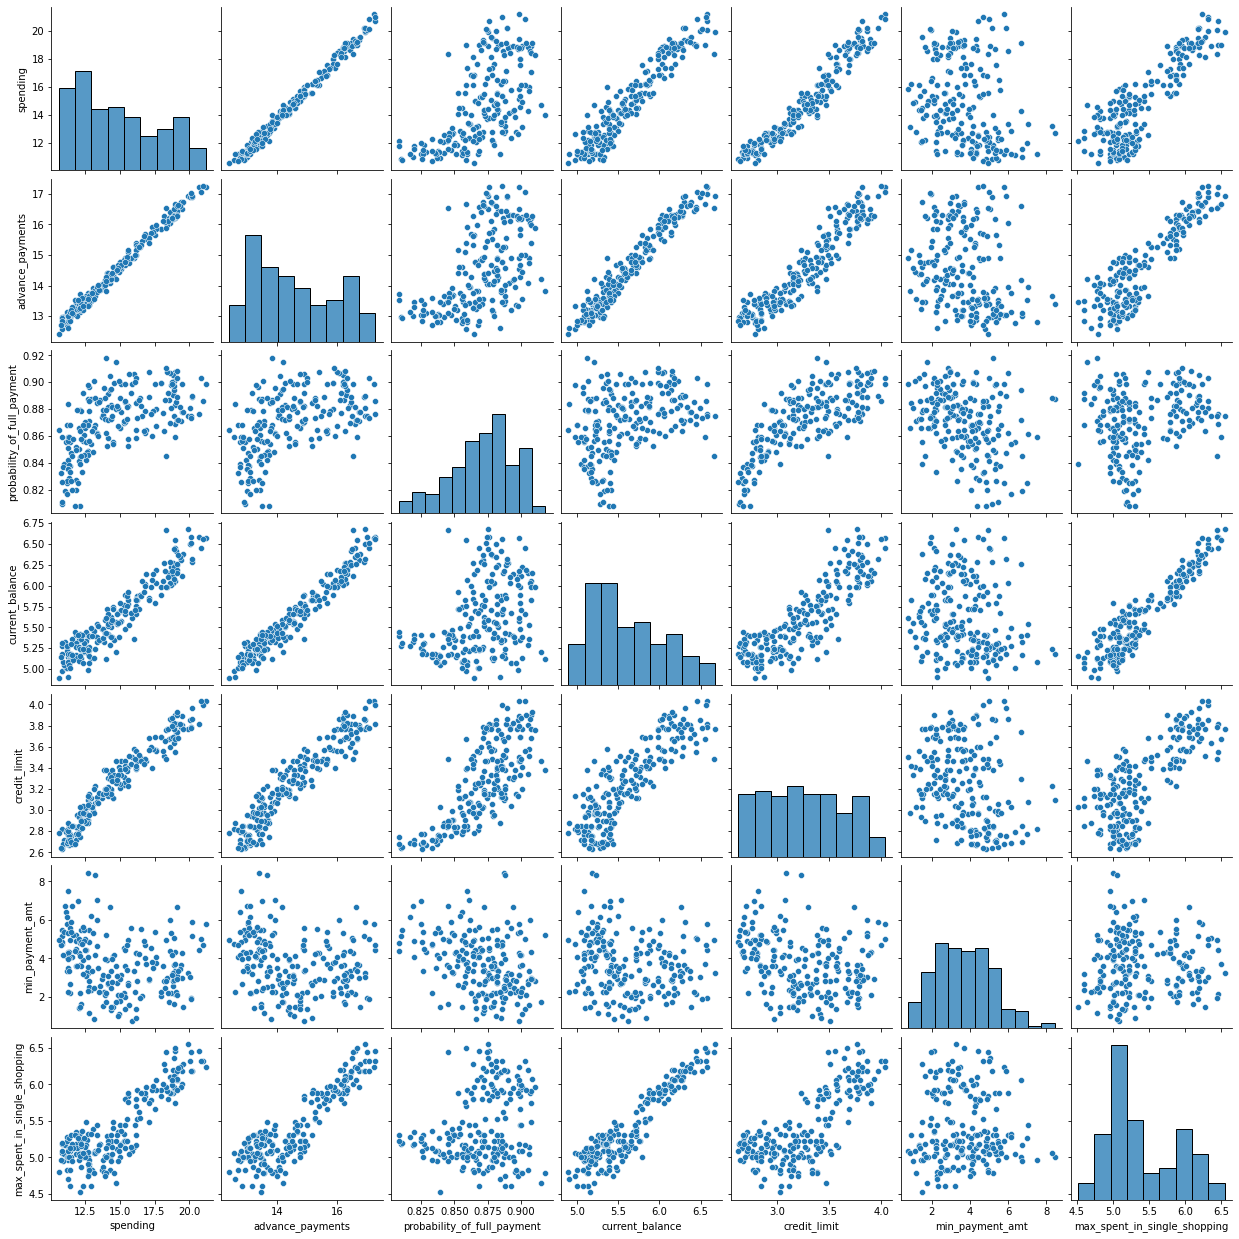

In [15]:
sns.pairplot(df)
plt.show()

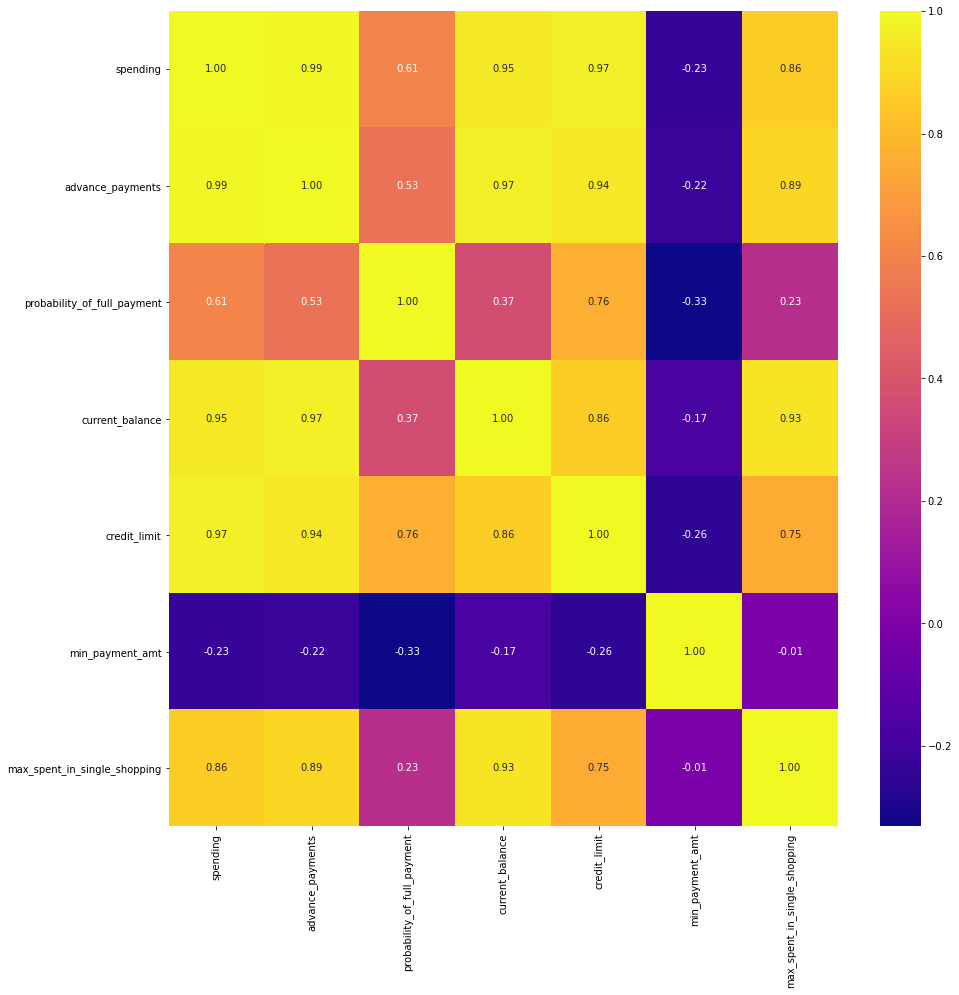

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f", cmap='plasma');

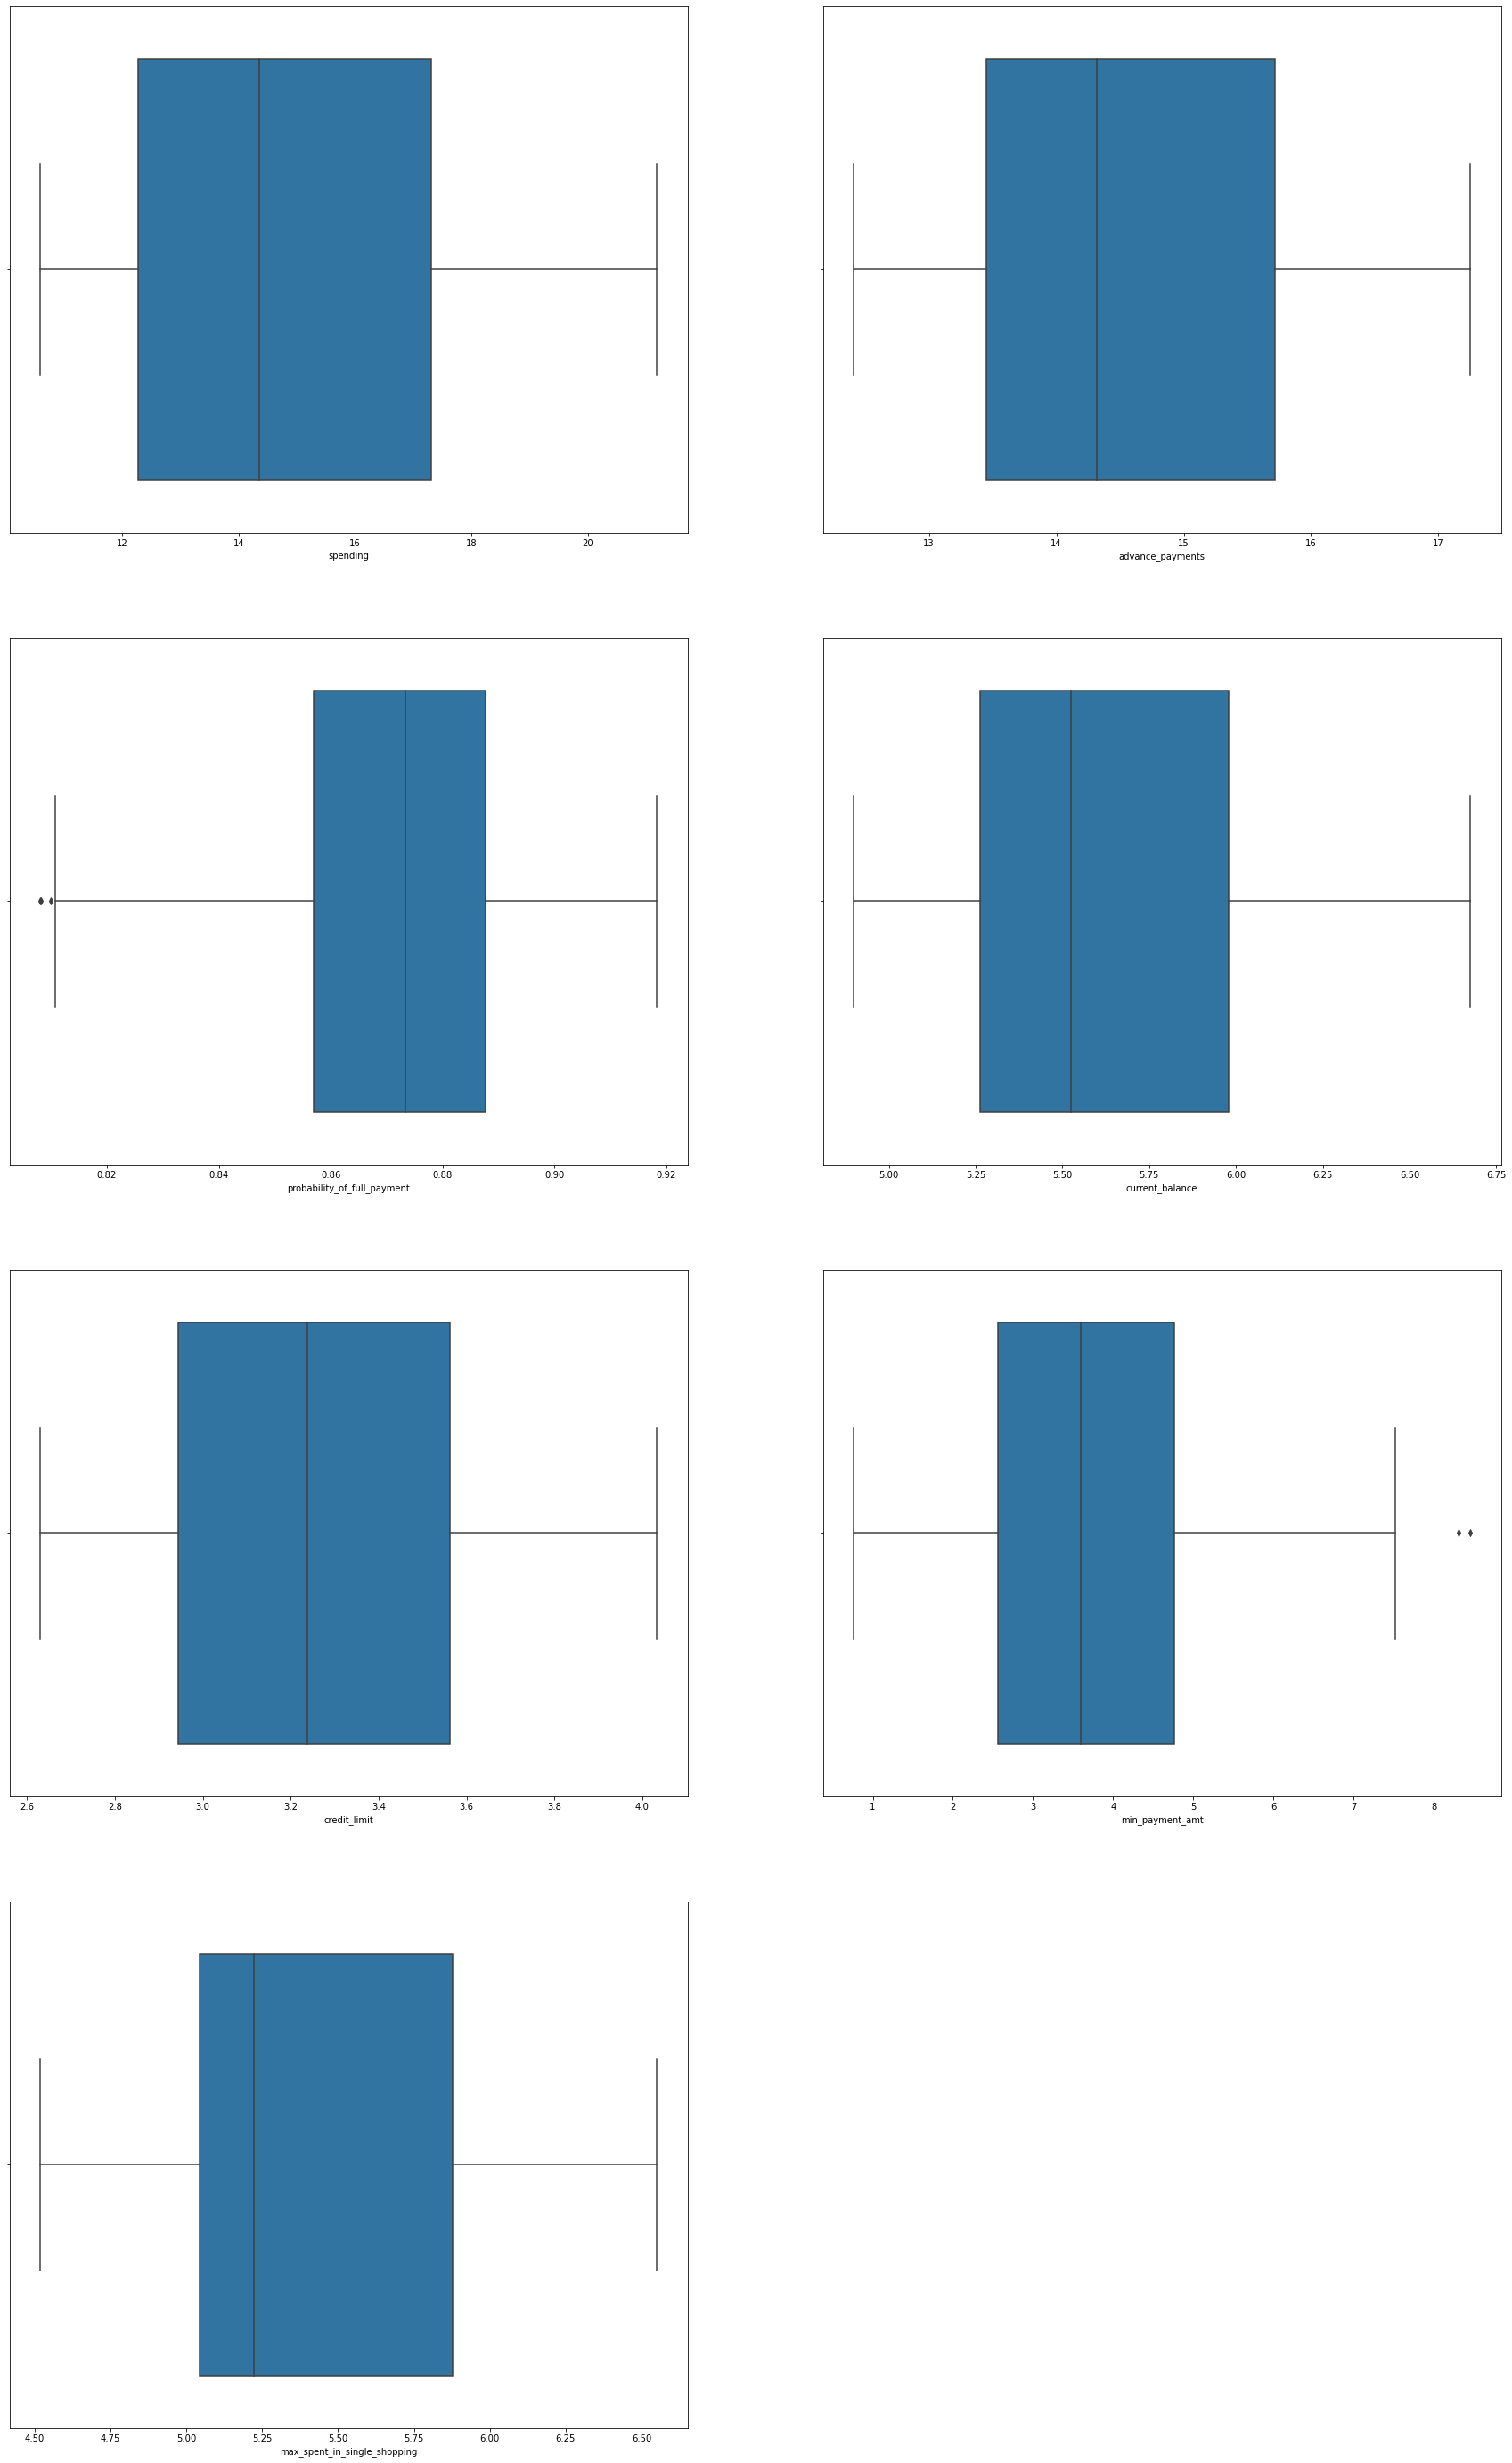

In [17]:
plt.figure(figsize=(30,50))

My_coulmns = ['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']
for i in range(0,7):
    plt.subplot(4,2,i+1)
    sns.boxplot(df[My_coulmns[i]])

#### 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [18]:
X = StandardScaler()

In [19]:
scaled_df = X.fit_transform(df)

In [20]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

#### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [21]:
wardlink = linkage(scaled_df, method = 'ward')

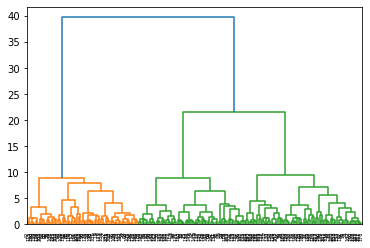

In [22]:
dend = dendrogram(wardlink)

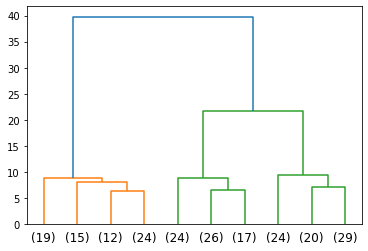

In [23]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [55]:
clusters = fcluster(wardlink, 15, criterion='distance')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [56]:
df_h['clusters'] = clusters

In [57]:
df_h.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


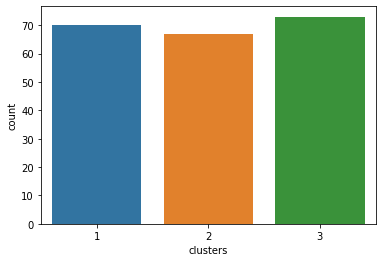

In [58]:
#df_h.hist(column = 'clusters');
sns.countplot(df_h['clusters']);

In [59]:
df_h.clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

In [60]:
aggdata=df_h.iloc[:,:].groupby('clusters').mean()
aggdata['Freq']=df_h.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [61]:
df_h.to_csv('hc.csv')

#### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [62]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

1469.9999999999995

In [63]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
k_means.inertia_

659.1717544870411

In [64]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

430.65897315130064

In [65]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

371.2935481943967

In [66]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

326.5519297938129

In [67]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

289.68047567821947

In [68]:
wss = [] 

In [69]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [70]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.6531439995162,
 328.01918429839526,
 289.203968672384,
 262.2171187846522,
 240.37238672691535,
 222.53254255765307,
 204.95084437811119]

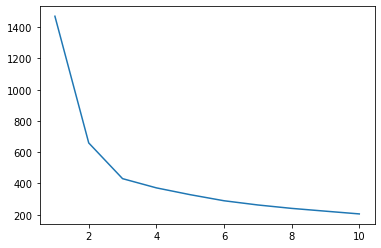

In [71]:
plt.plot(range(1,11), wss)

In [72]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [73]:
df_k["Clus_kmeans"] = labels
df_k.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2,0.362276


In [74]:
silhouette_score(scaled_df,labels)

0.40072705527512986

In [75]:
sil_width = silhouette_samples(scaled_df,labels)

In [76]:
df_k["sil_width"] = sil_width
df_k.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2,0.362276


In [77]:
silhouette_samples(scaled_df,labels).min()

0.002713089347678376

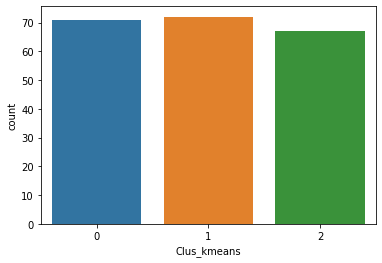

In [78]:
sns.countplot(df_k['Clus_kmeans']);

In [79]:
df_k[df_k['Clus_kmeans'] == 0].shape

(71, 9)

In [80]:
df_k[df_k['Clus_kmeans'] == 1].shape

(72, 9)

In [81]:
df_k[df_k['Clus_kmeans'] == 2].shape

(67, 9)

In [82]:
df_k.Clus_kmeans.value_counts().sort_index()

0    71
1    72
2    67
Name: Clus_kmeans, dtype: int64

In [83]:
clust_profile=df_k.groupby('Clus_kmeans').mean()
clust_profile['freq']=df_k.Clus_kmeans.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,freq
Clus_kmeans,,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,0.339816,71
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,0.397473,72
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,0.468772,67


In [84]:
df_k.to_csv('km.csv')